# Add Package

In [1]:
import Pkg; Pkg.add("DecisionTree")
import Pkg; Pkg.add("ScikitLearn")
import Pkg; Pkg.add("CSV")
import Pkg; Pkg.add("DataFrames")
import Pkg; Pkg.add("PyPlot")

   Resolving package versions...
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\acer\.julia\environments\v1.9\Manifest.toml`


In [1]:
import Pkg; Pkg.add("MLJ")

   Resolving package versions...
   Installed EarlyStopping ─────────── v0.1.9
   Installed ProgressMeter ─────────── v1.9.0
   Installed Memento ───────────────── v1.4.1
   Installed MLJModels ─────────────── v0.14.7
   Installed ComputationalResources ── v0.3.2
   Installed MLJScientificTypes ────── v0.4.5
   Installed ColorTypes ────────────── v0.10.12
   Installed PersistenceDiagramsBase ─ v0.1.1
   Installed JLSO ──────────────────── v2.7.0
   Installed IterationControl ──────── v0.4.0
   Installed MLJSerialization ──────── v1.1.3
   Installed MLJIteration ──────────── v0.3.0
   Installed MLJBase ───────────────── v0.18.1
   Installed LearnBase ─────────────── v0.4.1
   Installed BSON ──────────────────── v0.3.7
   Installed URIs ──────────────────── v1.5.1
   Installed MLJEnsembles ──────────── v0.1.1
   Installed ScientificTypesBase ───── v1.0.0
   Installed MLJTuning ─────────────── v0.6.9
   Installed MLJOpenML ─────────────── v1.0.0
   Installed LossFunctions ─────────── v0.6

# Use Package

In [2]:
using DecisionTree
using ScikitLearn, Random, Statistics
using PyPlot

# Practice

In [3]:
# Create Dataset
X = 5 * rand(50, 1)
y = 2 .*(X).+0.5.*rand(50, 1)

println("size(X) == (50, 1): $(size(X) == (50, 1))")
println("size(y) == (50, 1): $(size(y) == (50, 1))")
# Every 5 points are shifted by a random amount
#y[1:5:end] += 10 * (0.5 .- rand(10))
X = vec(X)
y = vec(y)

size(X) == (50, 1): true
size(y) == (50, 1): true


50-element Vector{Float64}:
 7.565619320267532
 1.678775054591839
 3.7621223580683165
 0.5639069308673265
 0.34313843825434065
 6.7674726433478485
 7.533408857752562
 1.1286737127976096
 0.986112306143899
 4.157797089031169
 4.952504158421339
 1.6240847758138135
 6.706641720718664
 ⋮
 7.042048337488516
 7.305737698830511
 3.912589746639027
 6.706540637255793
 9.218725899778345
 0.42961598081360464
 8.717603912425544
 3.116034811080584
 5.037386344157057
 8.973876893248768
 8.31574939401581
 4.049054233584065

In [4]:
# Modeling
# Create model
lr = ScikitLearn.Models.LinearRegression(multi_output=false)
# Train the model
fit!(lr, X, y)

ScikitLearn.Models.LinearRegression{Matrix{Float64}, Float64}([1.9944296204176537;;], [0.26438093283283515])

In [13]:
# Prediction
y_pred = vec(predict(lr, X))



50-element Vector{Float64}:
 7.576957928363498
 1.7022355039244532
 3.7364618928167928
 0.40086057551607135
 0.27432886256796957
 6.912798485331208
 7.2810250152915845
 1.1180568036098468
 1.1208067168290774
 4.149234620977342
 4.712252702733377
 1.4054832646042645
 6.7489453147677905
 ⋮
 7.134182144476844
 7.113426919646697
 4.116542938783953
 6.874342190873588
 9.172931266628382
 0.6645027008061125
 8.670666076113061
 3.1824372289459517
 4.843693668865364
 9.10512761781542
 8.289277973865042
 4.031880520121311

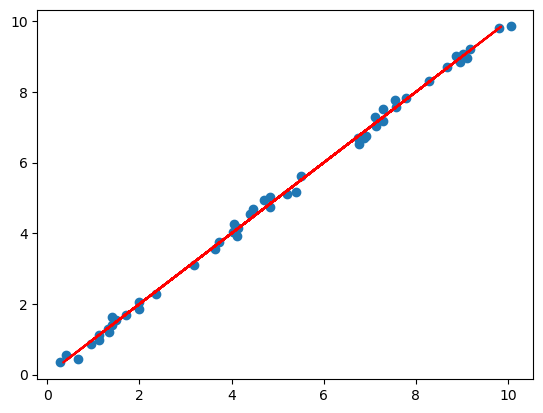

([1.9944296204176537;;], [0.26438093283283515])

In [6]:
#Plot
fig2 = scatter(y_pred, y) # Plot our approximation 
plot(y, y, "r-")
(lr.coefs,lr.intercepts)

# Export to CSV

In [14]:
using CSV
using DataFrames

df = DataFrame(X = X, 
               Y = y,
               y_predict = y_pred
               )

Row,X,Y,y_predict
,Float64,Float64,Float64
1,3.6665,7.56562,7.57696
2,0.720935,1.67878,1.70224
3,1.74089,3.76212,3.73646
4,0.0684304,0.563907,0.400861
5,0.00498786,0.343138,0.274329
6,3.33349,6.76747,6.9128
7,3.51812,7.53341,7.28103
8,0.42803,1.12867,1.11806
9,0.429409,0.986112,1.12081


In [15]:
CSV.write("EX_Linear-export_df.csv", df) 

"EX_Linear-export_df.csv"